# Predicting Pet Adoption

# Our Research Team

- Brendon Hahm
- Justin Cun
- Shendo Yafuso
- Daren Nguyen

#Overview#

Our project will be looking at the analysis of animal adoptions for shelter animals. Annually, there are approximately [6.5 million companion animals](https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics#:~:text=Approximately%206.5%20million%20companion%20animals,approximately%207.2%20million%20in%202011.) that enter shelters nationwide. About [1.5 million shelter pets](https://iheartdogs.com/animal-shelters-wouldnt-be-so-crowded-if-everyone-knew-this/#:~:text=According%20to%20the%20ASPCA%2C%20about,vast%20improvement%20from%20years%20past.) are euthanized each year due to overcrowding so our ability to properly manage and predict adoptions are crucial to their wellbeing. We want to contribute to our understanding of handling these unnecessary problems.

<a id='research_question'></a>
# Research Question

Main Research Question: Can we create predictive models for adoption of dogs and cats (separately)? 

Other questions to also explore:
1. Can we create predictive models for adoption (yes or no) of cats and dogs? 
2. Would prediction models look similar in different areas (Sonoma and Austin)? 


<a id='Background and Prior Work'></a>
# Background and Prior Work


Since the start of Covid 19, people have been lonelier and the adoption of dogs and cats have been on the rise. For our project, we are interested in what categories in pets are more likely to be adopted. We specifically are sorting through data from the city of Austin and the city of Sonoma in order to make our predictive model. Some categories we looked at regarding dogs and cats were their breed, sex, size, days in the shelter, intake type, and intake condition. As a result, we are interested in seeing if we could create predictive models for adoptions of dogs and cats. 


References:
1. https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=all_records.csv
 
2. https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw 


# Hypothesis

We hypothesize that, with enough substantial data, we will be able to create accurate prediction models. We also hypothesize that the predictive models across both cities will be similar because geographic location should not affect the preferences people have for adopting a dog or cat. 

# Dataset(s)

- Dataset Name: Austin Animal Center Shelter Outcomes
- Link to the dataset: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=all_records.csv
- Number of observations: 76,977

The Austin dataset is a relatively more popular dataset on the topic of shelter outcomes due to the kaggle competition. We got the data from kaggle and it has many very valuable variables to help us explore and eventually predict animal outcomes


- Dataset Name: Animal Shelter Intake and Outcome
- Link to the dataset: https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw
- Number of observations: 20,654 

The Sonoma dataset is much smaller and not as rich in variables as the Austin dataset but has many shared variables. This dataset will be used as a comparison to any work we do on the Austin dataset. 

We will not be combining the datasets as the Austin dataset has more useful variables that we would like to incorporate into our models. If we merged the two, then we would be forced to drop many of the variables in the Austin dataset. Instead, we will build models for them separately and observe the results for comparisons.

# Setup

**Imports and Datasets**

Pandas - Dataset handeling

Numpy - Support for Pandas and calculations

Matplotlib - Visualization and graphing

Seaborn - More visualization and graphing

Sklearn - Prediction modeling

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Data Cleaning Austin

Generally data cleaning for both datasets:
1. Drop unnecessary columns
2. Rename columns
3. Address NaNs
4. Adjust columns and rows for NaNs
5. Final check on dataframe
6. Subset dataframe into cats and dogs

Things to note for Austin dataset specifically: 
1. Weird values in various columns need to be cleaned (special characters, weird numbers, etc...)
2. Column names too long
3. Some columns may not be useful for modeling (consider removing)
4. Need to check datatypes and convert ints when needed


In [ ]:
data = pd.read_csv('all_records.csv', error_bad_lines=False, index_col = 0)
data

b'Skipping line 3062: expected 38 fields, saw 49\nSkipping line 12249: expected 38 fields, saw 51\n'
b'Skipping line 18371: expected 38 fields, saw 69\nSkipping line 27530: expected 38 fields, saw 47\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,Age,Breed_intake,Color_intake,Name_outcome,DateTime_outcome,MonthYear_outcome,Outcome_Type,Outcome_Subtype,Sex_upon_Outcome,Age_upon_Outcome,gender_intake,gender_outcome,fixed_intake,fixed_outcome,fixed_changed,Age_Bucket,retriever,shepherd,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,A730601,NaN,2016-07-07 12:11:00,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,NaN,2016-07-08 09:00:00,07/08/2016 09:00:00 AM,Transfer,SCRP,Neutered Male,7 months,Male,Male,Intact,Neutered,1.0,7-12 months,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0 days 20:49:00.000000000,0-7 days
1,A683644,*Zoey,2014-07-13 11:02:00,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White,*Zoey,2014-11-06 10:06:00,11/06/2014 10:06:00 AM,Adoption,Foster,Spayed Female,4 months,Female,Female,Intact,Spayed,1.0,1-6 weeks,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,115 days 23:04:00.000000000,12 weeks - 6 months
2,A676515,Rico,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Pit Bull Mix,White/Brown,Rico,2014-04-14 18:38:00,04/14/2014 06:38:00 PM,Return to Owner,NaN,Neutered Male,3 months,Male,Male,Intact,Neutered,1.0,1-6 months,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,3 days 09:53:00.000000000,0-7 days
3,A742953,NaN,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Saluki,Sable/Cream,NaN,2017-02-04 14:17:00,02/04/2017 02:17:00 PM,Transfer,Partner,Intact Male,2 years,Male,Male,Intact,Intact,0.0,1-3 years,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,4 days 00:47:00.000000000,0-7 days
4,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,*Gilbert,2014-06-16 13:54:00,06/16/2014 01:54:00 PM,Transfer,Partner,Neutered Male,2 months,Male,Male,Intact,Neutered,1.0,1-6 months,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,24 days 22:11:00.000000000,3-6 weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67263,A726484,Lucy,2016-05-11 12:54:00,05/11/2016 12:54:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,1 year,Chihuahua Shorthair Mix,Brown/White,Lucy,2016-05-29 18:34:00,05/29/2016 06:34:00 PM,Adoption,NaN,Intact Female,1 year,Female,Female,Intact,Intact,0.0,1-3 years,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,18 days 05:40:00.000000000,1-3 weeks
67264,A712543,*O'Malley,2015-09-24 18:21:00,09/24/2015 06:21:00 PM,18100 Maxa Dr in Manor (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Orange/White,*O'Malley,2015-10-16 17:08:00,10/16/2015 05:08:00 PM,Adoption,NaN,Neutered Male,2 months,Male,Male,Intact,Neutered,1.0,1-6 months,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,21 days 22:47:00.000000000,3-6 weeks
67265,A739588,Babe,2016-12-04 17:50:00,12/04/2016 05:50:00 PM,Yabers Ct in Austin (TX),Stray,Normal,Dog,Spayed Female,5 years,Pit Bull Mix,Blue/White,Babe,2016-12-05 17:50:00,12/05/2016 05:50:00 PM,Return to Owner,NaN,Spayed Female,5 years,Female,Female,Spayed,Spayed,0.0,4-6 years,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,1 days 00:00:00.000000000,0-7 days
67266,A736089,*Ramona,2016-10-03 17:10:00,10/03/2016 05:10:00 PM,Bee Cave Rd And Camp Craft Rd in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Chihuahua Shorthair/Rat Terrier,Tricolor,*Ramona,2016-10-10 15:30:00,10/10/2016 03:30:00 PM,Adoption,NaN,Spayed Female,1 year,Female,Female,Spayed,Spayed,0.0,1-3 years,0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,6 days 22:20:00.000000000,0-7 days


In [ ]:
columns = data.columns
#columns

In [ ]:
# Delete unnecessary columns
cols = ['Animal ID', 'Name_intake', 'DateTime_intake', 'MonthYear_intake', 'IntakeCondition', 'DateTime_intake', \
       'Found_Location', 'gender_intake', 'Age', 'Sex','Name_outcome', 'DateTime_outcome', \
        'MonthYear_outcome', 'Outcome_Subtype', 'fixed_changed', 'fixed_intake', 'Days_length', \
        'Sex_upon_Outcome', 'Color_intake', 'Age_upon_Outcome']
austin_df = data.drop(cols, axis = 1)

# Rename columns 
austin_df = austin_df.rename(columns={"Animal_Type_intake": 'Animal_Type', \
                        "gender_outcome": "Sex", 'DateTime_length': 'Days_Kept', \
                        'Breed_intake' : 'Breed', "Outcome_Type": "Outcome", \
                        'Age_Bucket' : 'Age','fixed_outcome': 'Fixed_Outcome'})

# Delete all rows that contain NaN values
austin_df = austin_df.dropna()

# Reset index
austin_df = austin_df.reset_index(drop = True)

# Fix days_kept column
# Keep only num. of days in Days_Kept column and drop 24 hour time
# Also drop specific index with weird value ('3-6')
austin_df['Days_Kept'] = austin_df['Days_Kept'].map(lambda x: ' '.join(x.split()[0:1]))
i = austin_df.loc[austin_df['Days_Kept']=='3-6'].index
austin_df = austin_df.drop(i)

# Convert values in Days_Kept into ints and filter rows with negative values
austin_df['Days_Kept'] = austin_df['Days_Kept'].map(lambda x: int(x))
austin_df = austin_df[austin_df['Days_Kept'] >= 0]

# Delete rows in outcome_type that have 'return to owner' or 'rtos' 
## since they are not relevant for looking at adoption rate

# Get indices where those types occur
rtos_lst1 = austin_df.index[austin_df['Outcome'].str.contains('Return to Owner', case = False)].tolist()

# Drop those indices and reset index
austin_df = austin_df.drop(index=rtos_lst1).reset_index(drop = True)

# Turn outcome_type into binary (1 = Adoption, 0 = all the others)
austin_df['Outcome'] = np.where(austin_df['Outcome'].str.contains('Adoption', case = False, regex = True), 1, 0)

# Convert dog value columns into ints
dog_cols = ['retriever'	,'shepherd',	'beagle',	'terrier',	'boxer',	'poodle', \
        'rottweiler',	'dachshund'	,'chihuahua'	,'pit bull']
austin_df[dog_cols] = austin_df[dog_cols].astype(int)

austin_df

,Intake_Type,Animal_Type,Breed,Outcome,Sex,Fixed_Outcome,Age,retriever,shepherd,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,Days_Kept
0,Stray,Cat,Domestic Shorthair Mix,0,Male,Neutered,7-12 months,0,0,0,0,0,0,0,0,0,0,0
1,Owner Surrender,Dog,Border Collie Mix,1,Female,Spayed,1-6 weeks,0,0,0,0,0,0,0,0,0,0,115
2,Stray,Dog,Saluki,0,Male,Intact,1-3 years,0,0,0,0,0,0,0,0,0,0,4
3,Stray,Cat,Domestic Shorthair Mix,0,Male,Neutered,1-6 months,0,0,0,0,0,0,0,0,0,0,24
4,Stray,Cat,Domestic Medium Hair Mix,1,Female,Spayed,1-3 years,0,0,0,0,0,0,0,0,0,0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23370,Owner Surrender,Dog,Australian Cattle Dog Mix,1,Male,Neutered,7-12 months,0,0,0,0,0,0,0,0,0,0,7
23371,Owner Surrender,Dog,Pit Bull Mix,0,Female,Intact,4-6 years,0,0,0,0,0,0,0,0,0,1,7
23372,Owner Surrender,Dog,Chihuahua Shorthair Mix,1,Female,Intact,1-3 years,0,0,0,0,0,0,0,0,1,0,18
23373,Stray,Cat,Domestic Shorthair Mix,1,Male,Neutered,1-6 months,0,0,0,0,0,0,0,0,0,0,21


In [ ]:
# Create 2 dfs - one for cats and one for dogs
# We will conduct separate analysis and modeling on these two dataframes
austin_cat = austin_df[(austin_df.Animal_Type.isin(['Cat']))].reset_index(drop=True)
austin_dog = austin_df[(austin_df.Animal_Type.isin(['Dog']))].reset_index(drop=True)

In [ ]:
cols = ['retriever'	,'shepherd',	'beagle',	'terrier',	'boxer',	'poodle', \
        'rottweiler',	'dachshund'	,'chihuahua'	,'pit bull']
austin_cat = austin_cat.drop(cols, axis = 1)
austin_cat

,Intake_Type,Animal_Type,Breed,Outcome,Sex,Fixed_Outcome,Age,Days_Kept
0,Stray,Cat,Domestic Shorthair Mix,0,Male,Neutered,7-12 months,0
1,Stray,Cat,Domestic Shorthair Mix,0,Male,Neutered,1-6 months,24
2,Stray,Cat,Domestic Medium Hair Mix,1,Female,Spayed,1-3 years,88
3,Owner Surrender,Cat,Domestic Medium Hair Mix,1,Female,Spayed,1-3 years,825
4,Owner Surrender,Cat,Domestic Medium Hair Mix,1,Female,Spayed,1-3 years,8
...,...,...,...,...,...,...,...,...
9688,Stray,Cat,Domestic Longhair Mix,0,Male,Intact,7-12 months,5
9689,Stray,Cat,Domestic Shorthair Mix,0,Female,Intact,Less than 1 week,0
9690,Stray,Cat,Domestic Shorthair Mix,1,Female,Spayed,1-3 years,166
9691,Stray,Cat,Domestic Longhair Mix,1,Male,Intact,1-6 months,4


In [ ]:
austin_dog

,Intake_Type,Animal_Type,Breed,Outcome,Sex,Fixed_Outcome,Age,retriever,shepherd,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,Days_Kept
0,Owner Surrender,Dog,Border Collie Mix,1,Female,Spayed,1-6 weeks,0,0,0,0,0,0,0,0,0,0,115
1,Stray,Dog,Saluki,0,Male,Intact,1-3 years,0,0,0,0,0,0,0,0,0,0,4
2,Owner Surrender,Dog,Pit Bull Mix,1,Male,Neutered,1-6 months,0,0,0,0,0,0,0,0,0,1,6
3,Stray,Dog,Pit Bull Mix,0,Male,Intact,1-3 years,0,0,0,0,0,0,0,0,0,1,7
4,Stray,Dog,Boxer/Labrador Retriever,1,Female,Spayed,1-3 years,1,0,0,0,1,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,Stray,Dog,Pit Bull Mix,1,Female,Spayed,1-3 years,0,0,0,0,0,0,0,0,0,1,18
13438,Owner Surrender,Dog,Australian Cattle Dog Mix,1,Male,Neutered,7-12 months,0,0,0,0,0,0,0,0,0,0,7
13439,Owner Surrender,Dog,Pit Bull Mix,0,Female,Intact,4-6 years,0,0,0,0,0,0,0,0,0,1,7
13440,Owner Surrender,Dog,Chihuahua Shorthair Mix,1,Female,Intact,1-3 years,0,0,0,0,0,0,0,0,1,0,18


# Data Cleaning Sonoma

Summary of cleaning

1. Drop unnecessary columns (either because redundancy or irrelevant) 
2. delete pets with return to owners because they are irrelevant to predicting adoption
3. make adoption binary (adoption = 1, all else = 0)
4. create cat and dog dfs
5. create dummy variables of dog breeds (this is to match the Austin dataset and will be helpful for modelling later)

Things to note for Sonoma dataset specifically:
1. Less variables so be careful with column dropping
2. Can't remove too many rows because much less rows than Austin dataset
3. There's no columns that have 0's and 1's for specific dog breeds like in the Austin dataset
4. A lot more data in this dataframe


In [ ]:
sonoma_df = pd.read_csv('Animal_Shelter_Intake_and_Outcome.csv')
print(sonoma_df.shape)
sonoma_df

(20695, 24)


,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,01/30/2021,02/05/2021,6,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,01/16/2018,K21-037709,CS05,A402139,01/16/2021,02/05/2021,20,STRAY,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1
2,*ANDY,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,09/06/2020,K20-037580,WESTFARM,A401875,12/26/2020,01/13/2021,18,STRAY,PHONE,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95436.0,"95436(38.491884, -122.90672)",1
3,*ANNE,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,KITTN,09/06/2020,K20-037581,WESTFARM,A401876,12/26/2020,01/13/2021,18,STRAY,PHONE,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.458965, -122.630156)",1
4,RICKY,DOG,LABRADOR RETR/MIX,BLUE/WHITE,Neutered,MED,01/04/2020,K21-037835,DS72,A402348,02/04/2021,02/05/2021,1,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20690,NaN,CAT,DOMESTIC SH,GRAY/WHITE,Female,SMALL,NaN,K19-031738,SMM,A385051,03/21/2019,03/21/2019,0,STRAY,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
20691,NaN,CAT,DOMESTIC SH,GRAY,Unknown,KITTN,NaN,K18-027667,RECEIVING,A370465,03/27/2018,03/27/2018,0,STRAY,COMM CAT,TRANSFER,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
20692,NaN,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,TOY,02/03/2017,K18-027158,DA16,A367906,02/03/2018,02/16/2018,13,STRAY,OVER THE COUNTER,TRANSFER,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1
20693,ANDY,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Neutered,TOY,04/24/2015,K17-022896,LOBBY,A349854,03/23/2017,04/08/2017,16,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1


In [ ]:
column_drop = ['Name', 'Impound Number', 'Kennel Number', 'Intake Date', 'Animal ID', \
               'Outcome Date', 'Intake Subtype', 'Outcome Subtype', 'Intake Jurisdiction', \
               'Outcome Jurisdiction', 'Outcome Zip Code', 'Location', 'Count', 'Color']
sonoma_df = sonoma_df.drop(sonoma_df[column_drop], axis = 1)
sonoma_df

,Type,Breed,Sex,Size,Date Of Birth,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition
0,CAT,SIAMESE,Spayed,KITTN,10/27/2020,6,OWNER SURRENDER,ADOPTION,UNKNOWN,PENDING
1,CAT,DOMESTIC SH,Neutered,SMALL,01/16/2018,20,STRAY,ADOPTION,UNKNOWN,PENDING
2,CAT,DOMESTIC SH,Neutered,KITTN,09/06/2020,18,STRAY,ADOPTION,HEALTHY,HEALTHY
3,CAT,DOMESTIC SH,Spayed,KITTN,09/06/2020,18,STRAY,ADOPTION,HEALTHY,HEALTHY
4,DOG,LABRADOR RETR/MIX,Neutered,MED,01/04/2020,1,CONFISCATE,RETURN TO OWNER,UNKNOWN,PENDING
...,...,...,...,...,...,...,...,...,...,...
20690,CAT,DOMESTIC SH,Female,SMALL,NaN,0,STRAY,EUTHANIZE,UNKNOWN,UNTREATABLE
20691,CAT,DOMESTIC SH,Unknown,KITTN,NaN,0,STRAY,TRANSFER,UNKNOWN,HEALTHY
20692,DOG,CHIHUAHUA LH/MIX,Male,TOY,02/03/2017,13,STRAY,TRANSFER,HEALTHY,HEALTHY
20693,DOG,CHIHUAHUA LH/MIX,Neutered,TOY,04/24/2015,16,STRAY,ADOPTION,TREATABLE/REHAB,TREATABLE/REHAB


In [ ]:
sonoma_df = sonoma_df.rename(columns={"Type": "animal", \
                        'Sex': 'sex', "Size" : "size", "Date Of Birth": "dob", \
                        "Days in Shelter": "days_in_shelter", 'Intake Type': 'intake_type', \
                        "Outcome Type": "outcome_type", 'Intake Condition': 'intake_condition', \
                        "Outcome Condition" : "outcome_condition"})



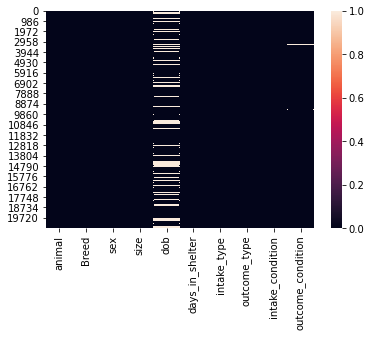

In [ ]:
#check for NaNs
sns.heatmap(sonoma_df.isnull())

In [ ]:
# amount of NaNs
sonoma_df['dob'].isna().sum()

5000

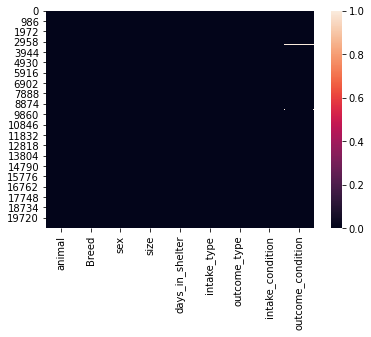

In [ ]:
#drop dob (too many NaNs)
sonoma_df = sonoma_df.drop('dob', axis = 1)
sns.heatmap(sonoma_df.isnull())

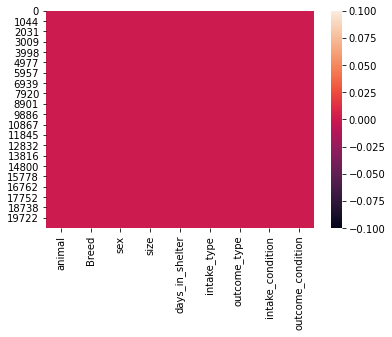

In [ ]:
#drop rows with NaNs
sonoma_df = sonoma_df.dropna(axis = 0)
sns.heatmap(sonoma_df.isnull())

In [ ]:
#checking columns
for col in sonoma_df.columns:
  print('COLUMN NAME: ' + col)
  print('\n')
  print(sonoma_df[col].value_counts())
  print('\n')

COLUMN NAME: animal


DOG      11529
CAT       7238
OTHER     1516
Name: animal, dtype: int64


COLUMN NAME: Breed


DOMESTIC SH                       5565
PIT BULL                          1554
CHIHUAHUA SH                       964
GERM SHEPHERD                      725
PIT BULL/MIX                       678
                                  ... 
YORKSHIRE TERR/POODLE TOY            1
CHINESE SHARPEI/LABRADOR RETR        1
PIT BULL/GOLDEN RETR                 1
BOERBOEL                             1
YORKSHIRE TERR/PARSON RUSS TER       1
Name: Breed, Length: 945, dtype: int64


COLUMN NAME: sex


Neutered    7014
Spayed      5878
Male        3097
Female      2625
Unknown     1669
Name: sex, dtype: int64


COLUMN NAME: size


SMALL    7878
MED      3642
LARGE    3584
KITTN    3216
TOY      1036
PUPPY     724
X-LRG     203
Name: size, dtype: int64


COLUMN NAME: days_in_shelter


0      3580
1      2088
3       897
2       812
7       656
       ... 
264       1
280       1
360       1

In [ ]:
# Delete rows in outcome_type that have 'return to owner' or 'rtos' 
## since they are not relevant for looking at adoption rate

# Get indices where those types occur
rtos_lst = sonoma_df.index[sonoma_df['outcome_type'].str.contains('return to owner|rtos', case = False)].tolist()

# Drop those indices and reset index
sonoma_df = sonoma_df.drop(index=rtos_lst).reset_index(drop = True)
#sonoma_df.shape
sonoma_df

# Turn outcome_type into binary (1 = Adoption, 0 = all the others)
sonoma_df['outcome_type'] = np.where(sonoma_df['outcome_type'].str.contains('adoption', case = False, regex = True), 1, 0)
sonoma_df

,animal,Breed,sex,size,days_in_shelter,intake_type,outcome_type,intake_condition,outcome_condition
0,CAT,SIAMESE,Spayed,KITTN,6,OWNER SURRENDER,1,UNKNOWN,PENDING
1,CAT,DOMESTIC SH,Neutered,SMALL,20,STRAY,1,UNKNOWN,PENDING
2,CAT,DOMESTIC SH,Neutered,KITTN,18,STRAY,1,HEALTHY,HEALTHY
3,CAT,DOMESTIC SH,Spayed,KITTN,18,STRAY,1,HEALTHY,HEALTHY
4,CAT,DOMESTIC SH,Spayed,SMALL,81,STRAY,0,HEALTHY,HEALTHY
...,...,...,...,...,...,...,...,...,...
13390,CAT,DOMESTIC SH,Female,SMALL,0,STRAY,0,UNKNOWN,UNTREATABLE
13391,CAT,DOMESTIC SH,Unknown,KITTN,0,STRAY,0,UNKNOWN,HEALTHY
13392,DOG,CHIHUAHUA LH/MIX,Male,TOY,13,STRAY,0,HEALTHY,HEALTHY
13393,DOG,CHIHUAHUA LH/MIX,Neutered,TOY,16,STRAY,1,TREATABLE/REHAB,TREATABLE/REHAB


In [ ]:
# Create 2 dfs - one for dogs and one for cats
# We will conduct separate analysis and modeling on these two dataframes
sonoma_dog = sonoma_df[(sonoma_df.animal.isin(['DOG']))].reset_index(drop=True)
sonoma_cat = sonoma_df[(sonoma_df.animal.isin(['CAT']))].reset_index(drop=True)

In [ ]:
# Add columns that returns 1 or 0 if the dog is a particular breed
# Columns similar to the Austin dataset we're using
sonoma_dog['retriever'] = np.where(sonoma_dog['Breed'].str.contains('retr', case = False, regex = True), 1, 0)
sonoma_dog['shepherd'] = np.where(sonoma_dog['Breed'].str.contains('shepherd', case = False, regex = True), 1, 0)
sonoma_dog['beagle'] = np.where(sonoma_dog['Breed'].str.contains('beagle', case = False, regex = True), 1, 0)
sonoma_dog['terrier'] = np.where(sonoma_dog['Breed'].str.contains('terrier', case = False, regex = True), 1, 0)
sonoma_dog['boxer'] = np.where(sonoma_dog['Breed'].str.contains('boxer', case = False, regex = True), 1, 0)
sonoma_dog['poodle'] = np.where(sonoma_dog['Breed'].str.contains('poodle', case = False, regex = True), 1, 0)
sonoma_dog['rottweiler'] = np.where(sonoma_dog['Breed'].str.contains('rottweiler', case = False, regex = True), 1, 0)
sonoma_dog['dachshund'] = np.where(sonoma_dog['Breed'].str.contains('dachshund', case = False, regex = True), 1, 0)
sonoma_dog['chihuahua'] = np.where(sonoma_dog['Breed'].str.contains('chihuahua', case = False, regex = True), 1, 0)
sonoma_dog['pit bull'] = np.where(sonoma_dog['Breed'].str.contains('pit bull', case = False, regex = True), 1, 0)

In [ ]:
sonoma_dog.head()

,animal,Breed,sex,size,days_in_shelter,intake_type,outcome_type,intake_condition,outcome_condition,retriever,shepherd,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull
0,DOG,BOXER/PIT BULL,Spayed,LARGE,100,OWNER SURRENDER,1,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,0,0,0,0,1,0,0,0,0,1
1,DOG,POODLE MIN,Spayed,SMALL,12,STRAY,1,UNKNOWN,PENDING,0,0,0,0,0,1,0,0,0,0
2,DOG,CHIHUAHUA SH,Male,SMALL,19,STRAY,1,UNKNOWN,TREATABLE/MANAGEABLE,0,0,0,0,0,0,0,0,1,0
3,DOG,RAT TERRIER,Neutered,SMALL,12,STRAY,1,HEALTHY,HEALTHY,0,0,0,1,0,0,0,0,0,0
4,DOG,PLOTT HOUND/MIX,Spayed,SMALL,35,STRAY,1,UNKNOWN,HEALTHY,0,0,0,0,0,0,0,0,0,0


In [ ]:
sonoma_cat.head()

,animal,Breed,sex,size,days_in_shelter,intake_type,outcome_type,intake_condition,outcome_condition
0,CAT,SIAMESE,Spayed,KITTN,6,OWNER SURRENDER,1,UNKNOWN,PENDING
1,CAT,DOMESTIC SH,Neutered,SMALL,20,STRAY,1,UNKNOWN,PENDING
2,CAT,DOMESTIC SH,Neutered,KITTN,18,STRAY,1,HEALTHY,HEALTHY
3,CAT,DOMESTIC SH,Spayed,KITTN,18,STRAY,1,HEALTHY,HEALTHY
4,CAT,DOMESTIC SH,Spayed,SMALL,81,STRAY,0,HEALTHY,HEALTHY


In [ ]:

cols = ['retriever'	,'shepherd',	'beagle',	'terrier',	'boxer',	'poodle', \
        'rottweiler',	'dachshund'	,'chihuahua'	,'pit bull']
for col in cols:
  print('COLUMN NAME: ' + col)
  print('\n')
  print(sonoma_dog[col].value_counts())
  print('\n')

COLUMN NAME: retriever


0    5378
1     393
Name: retriever, dtype: int64


COLUMN NAME: shepherd


0    5063
1     708
Name: shepherd, dtype: int64


COLUMN NAME: beagle


0    5699
1      72
Name: beagle, dtype: int64


COLUMN NAME: terrier


0    5551
1     220
Name: terrier, dtype: int64


COLUMN NAME: boxer


0    5707
1      64
Name: boxer, dtype: int64


COLUMN NAME: poodle


0    5619
1     152
Name: poodle, dtype: int64


COLUMN NAME: rottweiler


0    5649
1     122
Name: rottweiler, dtype: int64


COLUMN NAME: dachshund


0    5646
1     125
Name: dachshund, dtype: int64


COLUMN NAME: chihuahua


0    4580
1    1191
Name: chihuahua, dtype: int64


COLUMN NAME: pit bull


0    4435
1    1336
Name: pit bull, dtype: int64




# DATA ANALYSIS & RESULTS:

**We created and analyzed distributions of:**
1. days_kept/days_in_shelter
2. outcome/outcome_type

**Analysis**

We notice that for both days_kept and days_in_shelter, the data seems to exponentially decrease as days increases. This is likely accurate and not due to misinputs because shelters can't keep animals for too long.

The two have similar trends but the peak of the distribution for the Austin dataset is significantly higher than the Sonoma. We also notice that in outcome type, all the small or young animal types were more prevalent in the adoptions. Also being spayed or neutered were a much larger proportion individually than intact of those that were adopted. 
For the Sonoma county, it was even more severe of a difference (this *may* be due to the fact that Sonoma County euthanizes their animals as opposed to Austin).

We predict that both of these features will have a strong influence on the outcome of adoption and features we plan to include in our modeling.



##Dog Data Analysis and Results

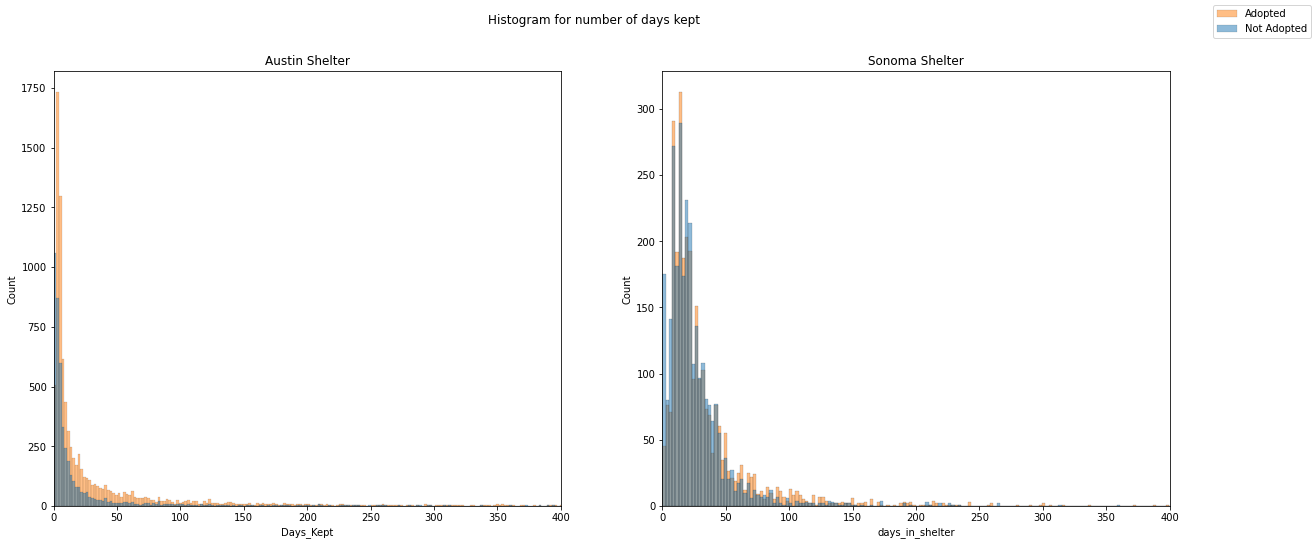

In [ ]:
#number of days kept at shelter until exit from each shelter
## all are cropped at 400
import matplotlib.pyplot as plt

plt, ax = plt.subplots(1,2, figsize = (20,8))

plt.suptitle('Histogram for number of days kept')

sns.histplot(data = austin_dog, x = 'Days_Kept', hue = "Outcome", ax=ax[0], legend= False).set(xlim=(0,400))
ax[0].set_title('Austin Shelter')
sns.histplot(data = sonoma_dog, x = 'days_in_shelter', hue = 'outcome_type', ax=ax[1], legend = False).set(xlim=(0,400))
ax[1].set_title('Sonoma Shelter')
plt.legend( labels=['Adopted','Not Adopted'])

plt.show()

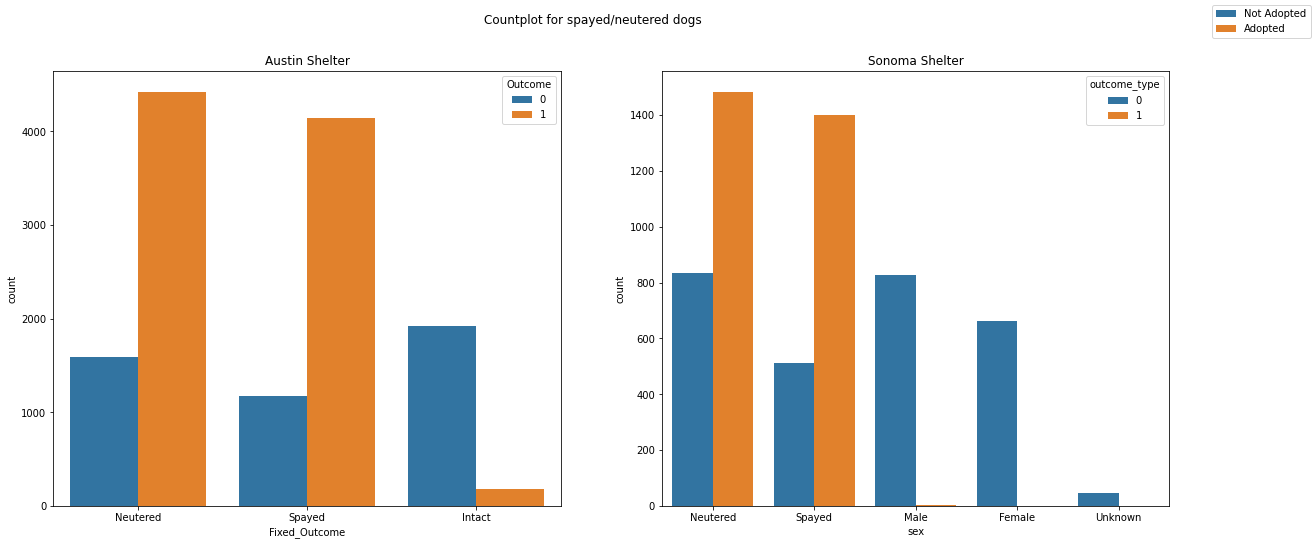

In [ ]:
#fixed status of the animals from each shelter
import matplotlib.pyplot as plt
plt, ax = plt.subplots(1,2, figsize = (20,8))

plt.suptitle('Countplot for spayed/neutered dogs')

sns.countplot(data = austin_dog, x = 'Fixed_Outcome', hue = 'Outcome', order = austin_dog['Fixed_Outcome'].value_counts().index, ax=ax[0])
ax[0].set_title('Austin Shelter')
sns.countplot(data = sonoma_dog, x = 'sex', hue = 'outcome_type', order = sonoma_dog['sex'].value_counts().index, ax=ax[1])
ax[1].set_title('Sonoma Shelter')

plt.legend(['Not Adopted','Adopted'])

plt.show()

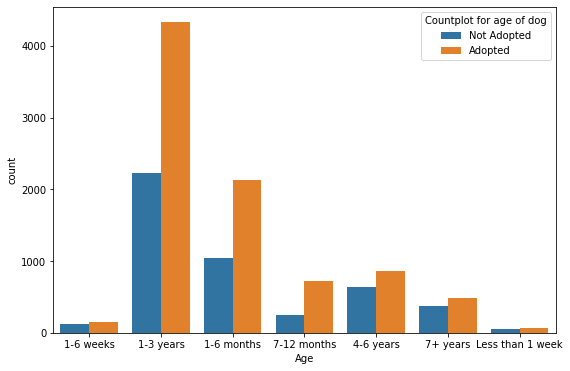

In [ ]:
#age compared to outcome for the austin shelter
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
g = sns.countplot(data = austin_dog, x = "Age", hue = "Outcome")
g.legend(['Not Adopted', 'Adopted'], title='Countplot for age of dog')
plt.show(g)

## Cat Data Analysis and Results

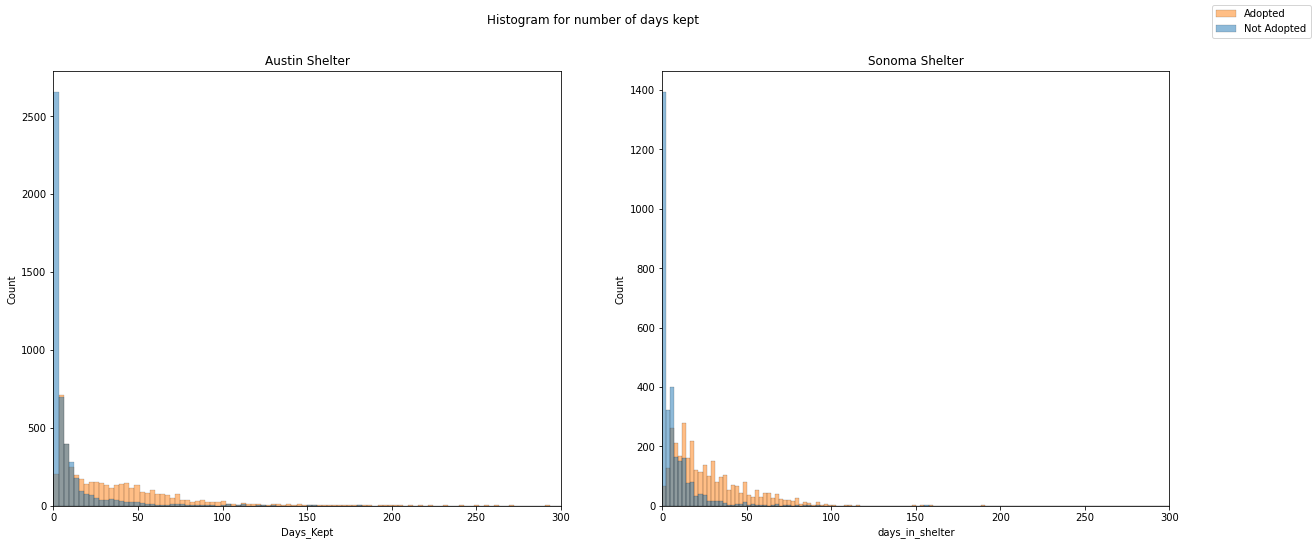

In [ ]:
#number of days kept at shelter until exit from each shelter
##all are cropped at 300
import matplotlib.pyplot as plt
plt, ax = plt.subplots(1,2, figsize = (20,8))

plt.suptitle('Histogram for number of days kept')

sns.histplot(data = austin_cat, x = 'Days_Kept', hue = "Outcome", legend = False, ax=ax[0]).set(xlim=(0,300))
ax[0].set_title('Austin Shelter')
sns.histplot(data = sonoma_cat, x = 'days_in_shelter', hue = 'outcome_type', legend = False, ax=ax[1]).set(xlim=(0,300))
ax[1].set_title('Sonoma Shelter')
plt.legend(labels=['Adopted', 'Not Adopted'])

plt.show()

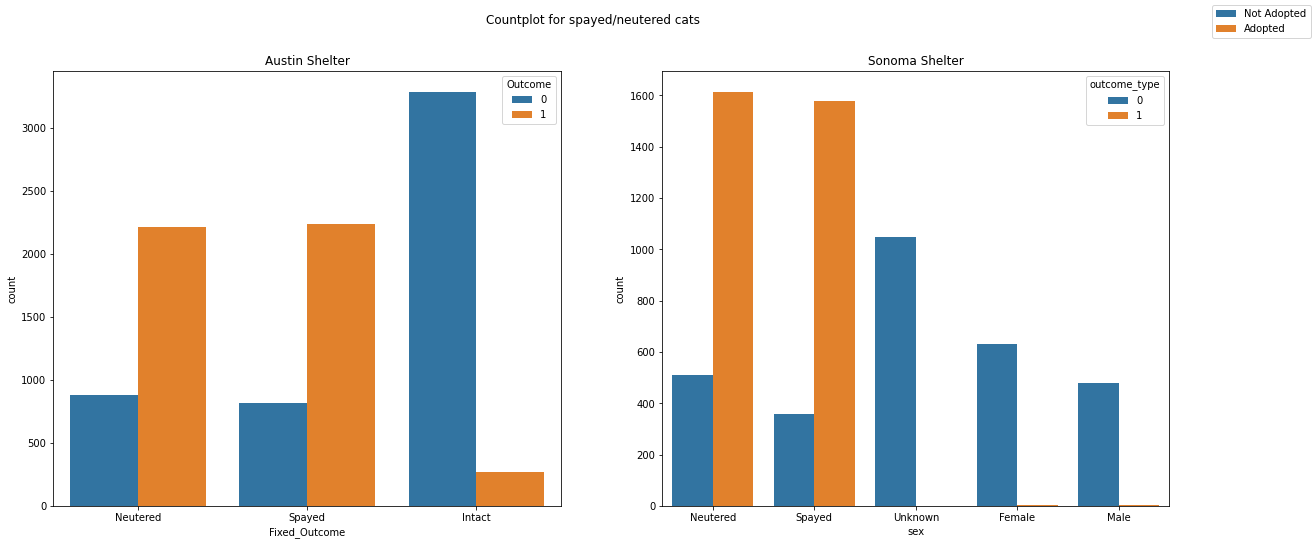

In [ ]:
#fixed status of the animals from each shelter

import matplotlib.pyplot as plt
plt, ax = plt.subplots(1,2, figsize = (20,8))

plt.suptitle('Countplot for spayed/neutered cats')

sns.countplot(data = austin_cat, x = 'Fixed_Outcome', hue = 'Outcome', ax=ax[0])
ax[0].set_title('Austin Shelter')
sns.countplot(data = sonoma_cat, x = 'sex', hue = 'outcome_type', order = sonoma_cat['sex'].value_counts().index, ax=ax[1])
ax[1].set_title('Sonoma Shelter')

plt.legend(['Not Adopted', 'Adopted'])
plt.show()

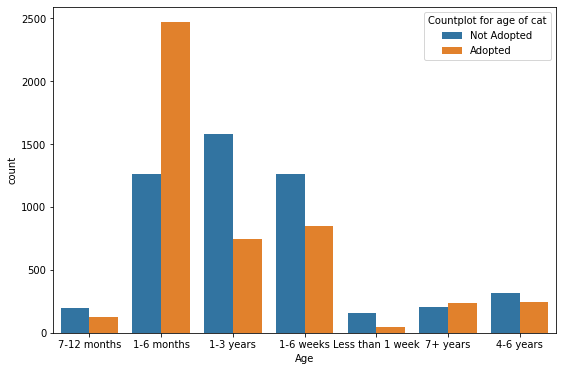

In [ ]:
#age compared to outcome for the austin shelter
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

g = sns.countplot(data = austin_cat, x = 'Age', hue = 'Outcome')
g.legend(['Not Adopted', 'Adopted'], title = 'Countplot for age of cat')
plt.show(g)

# Modeling


##Preparation for modeling

The predictive model we plan to implement is sklearn's **decision tree classifier**. A decision tree classifier is essentially a model that continuously splits and paritions data into branches according to a certain paramater. These splits are binary and the number of paritions are determined by a max_depth argument, where we eventually reach a prediction based on our outcome variable (adopted/not adopted).

Some issues we encountered:
- While a decision tree classifier can be used on both numeric **and** categorical features, sklearn's model does not allow categorical values. To get around this we used **one-hot encoding** (essentially creating dummy variables for the categorical columns) so that they can fit our data into sklearn's classifier.

- We also had to get around deciding the ideal **max_depth** level which is an argument that the decision tree takes. (max_depth = depth the tree will to grow to and, the larger the depth, the more complex the model will become). To find the ideal depth, we created a function that tests depth levels from 1-10 and found the level that resulted in the most accurate results.

- The specific dog breeds we kept in the columns (and created for the Sonoma dataset) did not result in any substantial increases or decreases in accuracy levels for the Austin or Sonoma dataframe. Since there's no change with or without it and since including these columns would make our model too specific to Austin and Sonoma pet adoptions, we decided to **not** include these columns in our predictions.

In [ ]:
#OneHotEncoding

#create encoding function
def encoder(X):
  enc = OneHotEncoder(handle_unknown= 'ignore')    
  enc_df = pd.DataFrame(enc.fit_transform(X).toarray())
  return enc_df


In [ ]:
#function for choosing best depth level
def depth_1_to_10(X, y):
  training_scores = []
  testing_scores = []
  depths = range(1, 11)
  for num in range(1, 11):
    print('depth = ', num)

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=12)

    tree_model = tree.DecisionTreeClassifier(max_depth = num)

    tree_model = tree_model.fit(Xtrain, ytrain)
    print('training accuracy score: ', tree_model.score(Xtrain, ytrain))
    print('testing accuracy score: ', tree_model.score(Xtest, ytest))
    training_scores.append(tree_model.score(Xtrain, ytrain))
    testing_scores.append(tree_model.score(Xtest, ytest))
    print('\n')

  print('\n')
  print('training accuracy scores = red')
  print('testing accuracy scores = blue')
  sns.lineplot(x = depths, y = training_scores, color = 'red')
  sns.lineplot(x = depths, y = testing_scores, color = 'blue')


## MODELING AUSTIN DOG

In [ ]:
#creating final dog dataset
#encode categorical variables
X_categ = austin_dog[['Sex', 'Intake_Type', 'Fixed_Outcome']]
X_categ = encoder(X_categ)

#reform dataset
X_num = austin_dog[['Days_Kept']]
X_categ['Days_Kept'] = X_num
X_austin_dog = X_categ

dog_columns = austin_dog[['retriever', 'shepherd', 'beagle', 'terrier', \
       'boxer', 'poodle', 'rottweiler', 'dachshund', 'chihuahua', 'pit bull']]
X_austin_dog = pd.concat([X_austin_dog,dog_columns], axis = 1)

print(X_austin_dog)


Y_austin_dog = austin_dog['Outcome']

         0    1    2    3  ...  rottweiler  dachshund  chihuahua  pit bull
0      1.0  0.0  0.0  1.0  ...           0          0          0         0
1      0.0  1.0  0.0  0.0  ...           0          0          0         0
2      0.0  1.0  0.0  1.0  ...           0          0          0         1
3      0.0  1.0  0.0  0.0  ...           0          0          0         1
4      1.0  0.0  0.0  0.0  ...           0          0          0         0
...    ...  ...  ...  ...  ...         ...        ...        ...       ...
13437  1.0  0.0  0.0  0.0  ...           0          0          0         1
13438  0.0  1.0  0.0  1.0  ...           0          0          0         0
13439  1.0  0.0  0.0  1.0  ...           0          0          0         1
13440  1.0  0.0  0.0  1.0  ...           0          0          1         0
13441  1.0  0.0  0.0  0.0  ...           0          0          1         0

[13442 rows x 20 columns]


depth =  1
training accuracy score:  0.7824620573355818
testing accuracy score:  0.7750669443617971


depth =  2
training accuracy score:  0.7824620573355818
testing accuracy score:  0.7750669443617971


depth =  3
training accuracy score:  0.7860331316337665
testing accuracy score:  0.7842903897649509


depth =  4
training accuracy score:  0.787719472274576
testing accuracy score:  0.7816126152930676


depth =  5
training accuracy score:  0.7903977779982144
testing accuracy score:  0.7842903897649509


depth =  6
training accuracy score:  0.7918857256224581
testing accuracy score:  0.7842903897649509


depth =  7
training accuracy score:  0.7947624243626624
testing accuracy score:  0.7828027372805713


depth =  8
training accuracy score:  0.7977383196111497
testing accuracy score:  0.7825052067836953


depth =  9
training accuracy score:  0.8017061799424661
testing accuracy score:  0.7807200238024398


depth =  10
training accuracy score:  0.8067652018648943
testing accuracy score:  0

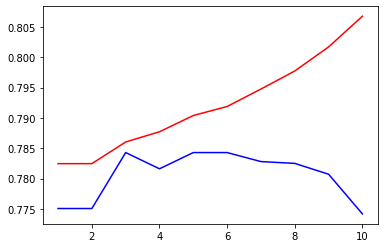

In [ ]:
#finding best depth level for austin dog
depth_1_to_10(X_austin_dog, Y_austin_dog)

In [ ]:
#austin dog model with depth 3

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_austin_dog, Y_austin_dog, \
                                                random_state=12)

tree_model = tree.DecisionTreeClassifier(max_depth = 3)

tree_model = tree_model.fit(Xtrain, Ytrain)

In [ ]:
#assessing austin dog model with depth 3
Y_predict = tree_model.predict(Xtest)
confusion_matrix = metrics.confusion_matrix(Ytest, tree_model.predict(Xtest))
tn, fl, fn, tp = metrics.confusion_matrix(Ytest, tree_model.predict(Xtest)).ravel()

print('Confusion Matrix: ', '\n', metrics.confusion_matrix(Ytest, Y_predict))
print('\n')
print('True Negative: ', tn)
print('False Negative: ', fn)
print('True Positive: ', tp)
print('False Positive: ', fl)
print('\n')
print('Training Accuracy Score: ', tree_model.score(Xtrain, Ytrain))
print('Testing Accuracy Score: ', tree_model.score(Xtest, Ytest)) 
print('\n')
print('Sensitivity Score:', tp/(tp+fl))
print('Specificity Score:', tn/(tn+fn))

Confusion Matrix:  
 [[ 565  619]
 [ 106 2071]]


True Negative:  565
False Negative:  106
True Positive:  2071
False Positive:  619


Training Accuracy Score:  0.7860331316337665
Testing Accuracy Score:  0.7842903897649509


Sensitivity Score: 0.7698884758364313
Specificity Score: 0.842026825633383


[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.454\nsamples = 10081\nvalue = [3507, 6574]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.367\nsamples = 8493\nvalue = [2056, 6437]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.447\nsamples = 2487\nvalue = [838, 1649]'),
 Text(20.925, 27.180000000000007, 'gini = 0.498\nsamples = 343\nvalue = [183, 160]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.424\nsamples = 2144\nvalue = [655, 1489]'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 2.5\ngini = 0.323\nsamples = 6006\nvalue = [1218, 4788]'),
 Text(104.625, 27.180000000000007, 'gini = 0.479\nsamples = 63\nvalue = [38, 25]'),
 Text(146.475, 27.180000000000007, 'gini = 0.318\nsamples = 5943\nvalue = [1180, 4763]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 12.5\ngini = 0.158\nsamples = 1588\nvalue = [1451, 137]'),
 Text(209.25, 81.53999999999999, 'X[9] <= 3.5\ngini = 0.12\nsamples = 1341\nvalue = [1255, 86]'),
 Text(188.32500000000002, 27.180000000000007, 'gini 

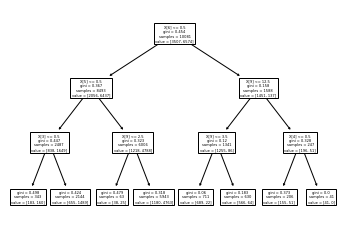

In [ ]:
tree.plot_tree(tree_model)

## MODELING AUSTIN CAT

In [ ]:
#creating final cat dataset
#encode categorical variables
X_categ = austin_cat[['Sex', 'Intake_Type', 'Fixed_Outcome']]
X_categ = encoder(X_categ)

#reform dataset
X_num = austin_cat[['Days_Kept']]
X_categ['Days_Kept'] = X_num
X_austin_cat = X_categ

print(X_austin_cat)

Y_austin_cat = austin_cat['Outcome']

        0    1    2    3    4    5    6    7    8  Days_Kept
0     0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0          0
1     0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0         24
2     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0         88
3     1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0        825
4     1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0          8
...   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...
9688  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0          5
9689  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0          0
9690  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0        166
9691  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0          4
9692  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0         21

[9693 rows x 10 columns]


depth =  1
training accuracy score:  0.7963956527720457
testing accuracy score:  0.801980198019802


depth =  2
training accuracy score:  0.82294676021461
testing accuracy score:  0.8238448844884488


depth =  3
training accuracy score:  0.8276241573806575
testing accuracy score:  0.8267326732673267


depth =  4
training accuracy score:  0.8298252854587976
testing accuracy score:  0.8275577557755776


depth =  5
training accuracy score:  0.8305131379832164
testing accuracy score:  0.8250825082508251


depth =  6
training accuracy score:  0.8334021185857752
testing accuracy score:  0.8246699669966997


depth =  7
training accuracy score:  0.8339524006053102
testing accuracy score:  0.8254950495049505


depth =  8
training accuracy score:  0.8379419452469391
testing accuracy score:  0.8238448844884488


depth =  9
training accuracy score:  0.8398679323153116
testing accuracy score:  0.8238448844884488


depth =  10
training accuracy score:  0.8434447654422892
testing accuracy score:  0.8

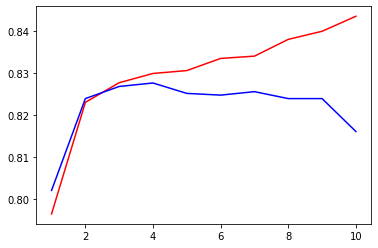

In [ ]:
#finding best depth level for austin cat
depth_1_to_10(X_austin_cat, Y_austin_cat)

In [ ]:
#austin cat model with depth 3

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_austin_cat, Y_austin_cat, random_state=12)

tree_model = tree.DecisionTreeClassifier(max_depth = 3)

tree_model = tree_model.fit(Xtrain, Ytrain)

In [ ]:
#assessing austin cat model with depth 3
Y_predict = tree_model.predict(Xtest)
confusion_matrix = metrics.confusion_matrix(Ytest, tree_model.predict(Xtest))
tn, fl, fn, tp = metrics.confusion_matrix(Ytest, tree_model.predict(Xtest)).ravel()

print('Confusion Matrix: ', '\n', metrics.confusion_matrix(Ytest, Y_predict))
print('\n')
print('True Negative: ', tn)
print('False Negative: ', fn)
print('True Positive: ', tp)
print('False Positive: ', fl)
print('\n')
print('Training Accuracy Score: ', tree_model.score(Xtrain, Ytrain))
print('Testing Accuracy Score: ', tree_model.score(Xtest, Ytest)) 
print('\n')
print('Sensitivity Score:', tp/(tp+fl))
print('Specificity Score:', tn/(tn+fn))

Confusion Matrix:  
 [[ 885  354]
 [  66 1119]]


True Negative:  885
False Negative:  66
True Positive:  1119
False Positive:  354


Training Accuracy Score:  0.8276241573806575
Testing Accuracy Score:  0.8267326732673267


Sensitivity Score: 0.7596741344195519
Specificity Score: 0.9305993690851735


[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.5\nsamples = 7269\nvalue = [3742, 3527]'),
 Text(83.7, 135.9, 'X[9] <= 1.5\ngini = 0.401\nsamples = 4607\nvalue = [1280, 3327]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.326\nsamples = 327\nvalue = [260, 67]'),
 Text(20.925, 27.180000000000007, 'gini = 0.017\nsamples = 231\nvalue = [229, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.437\nsamples = 96\nvalue = [31, 65]'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 22.5\ngini = 0.363\nsamples = 4280\nvalue = [1020, 3260]'),
 Text(104.625, 27.180000000000007, 'gini = 0.441\nsamples = 2117\nvalue = [694, 1423]'),
 Text(146.475, 27.180000000000007, 'gini = 0.256\nsamples = 2163\nvalue = [326, 1837]'),
 Text(251.10000000000002, 135.9, 'X[9] <= 3.5\ngini = 0.139\nsamples = 2662\nvalue = [2462, 200]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.026\nsamples = 1854\nvalue = [1830, 24]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.008\

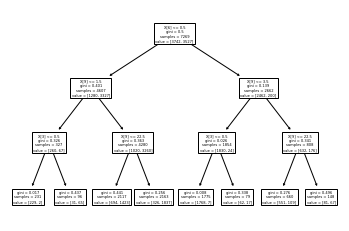

In [ ]:
tree.plot_tree(tree_model)

## MODELING SONOMA DOG


In [ ]:
#creating final dog dataset
#encode categorical variables
X_categ = sonoma_dog[['sex', 'size', 'intake_type', 'outcome_condition']]
X_categ = encoder(X_categ)

print(X_categ)

#reform dataset
X_num = sonoma_dog[['days_in_shelter']]
X_categ['days_in_shelter'] = X_num
X_sonoma_dog = X_categ


dog_columns = sonoma_dog[['retriever', 'shepherd', 'beagle', 'terrier', \
       'boxer', 'poodle', 'rottweiler', 'dachshund', 'chihuahua', 'pit bull']]
X_sonoma_dog = pd.concat([X_sonoma_dog, dog_columns], axis = 1)


print(X_sonoma_dog)

y_sonoma_dog = sonoma_dog['outcome_type']

       0    1    2    3    4    5    6   ...   17   18   19   20   21   22   23
0     0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
5766  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5767  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
5768  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5769  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
5770  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[5771 rows x 24 columns]
        0    1

depth =  1
training accuracy score:  0.7860443622920518
testing accuracy score:  0.7775467775467776


depth =  2
training accuracy score:  0.8200092421441775
testing accuracy score:  0.8128898128898129


depth =  3
training accuracy score:  0.8484288354898336
testing accuracy score:  0.8468468468468469


depth =  4
training accuracy score:  0.8516635859519408
testing accuracy score:  0.8489258489258489


depth =  5
training accuracy score:  0.8569778188539742
testing accuracy score:  0.851004851004851


depth =  6
training accuracy score:  0.86090573012939
testing accuracy score:  0.851004851004851


depth =  7
training accuracy score:  0.8636783733826248
testing accuracy score:  0.8461538461538461


depth =  8
training accuracy score:  0.8673752310536045
testing accuracy score:  0.8461538461538461


depth =  9
training accuracy score:  0.8703789279112755
testing accuracy score:  0.8413028413028413


depth =  10
training accuracy score:  0.8722273567467652
testing accuracy score:  0.84

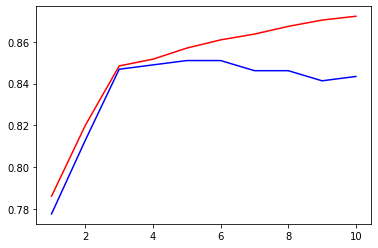

In [ ]:
#finding best depth level for dog
depth_1_to_10(X_sonoma_dog, y_sonoma_dog)

In [ ]:
#sonoma dog model with depth 3

Xtrain, Xtest, ytrain, ytest = train_test_split(X_sonoma_dog, y_sonoma_dog, random_state=12)

tree_model = tree.DecisionTreeClassifier(max_depth = 3)

tree_model = tree_model.fit(Xtrain, ytrain)

In [ ]:
#assessing sonoma dog model with depth 3
y_predict = tree_model.predict(Xtest)
confusion_matrix = metrics.confusion_matrix(ytest, tree_model.predict(Xtest))
tn, fl, fn, tp = metrics.confusion_matrix(ytest, tree_model.predict(Xtest)).ravel()

print('Confusion Matrix: ', '\n', metrics.confusion_matrix(ytest, y_predict))
print('\n')
print('True Negative: ', tn)
print('False Negative: ', fn)
print('True Positive: ', tp)
print('False Positive: ', fl)
print('\n')
print('Training Accuracy Score: ', tree_model.score(Xtrain, ytrain))
print('Testing Accuracy Score: ', tree_model.score(Xtest, ytest)) 
print('\n')
print('Sensitivity Score:', tp/(tp+fl))
print('Specificity Score:', tn/(tn+fn))

Confusion Matrix:  
 [[580 157]
 [ 64 642]]


True Negative:  580
False Negative:  64
True Positive:  642
False Positive:  157


Training Accuracy Score:  0.8484288354898336
Testing Accuracy Score:  0.8468468468468469


Sensitivity Score: 0.8035043804755945
Specificity Score: 0.9006211180124224


[Text(193.15384615384616, 190.26, 'X[19] <= 0.5\ngini = 0.5\nsamples = 4328\nvalue = [2144, 2184]'),
 Text(103.01538461538462, 135.9, 'X[23] <= 0.5\ngini = 0.217\nsamples = 1618\nvalue = [1418, 200]'),
 Text(51.50769230769231, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.339\nsamples = 921\nvalue = [722, 199]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.401\nsamples = 706\nvalue = [510, 196]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.028\nsamples = 215\nvalue = [212, 3]'),
 Text(154.52307692307693, 81.53999999999999, 'X[24] <= 41.5\ngini = 0.003\nsamples = 697\nvalue = [696, 1]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.0\nsamples = 639\nvalue = [639, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.034\nsamples = 58\nvalue = [57, 1]'),
 Text(283.2923076923077, 135.9, 'X[1] <= 0.5\ngini = 0.392\nsamples = 2710\nvalue = [726, 1984]'),
 Text(257.53846153846155, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.35\nsamples = 2563\nvalue = [57

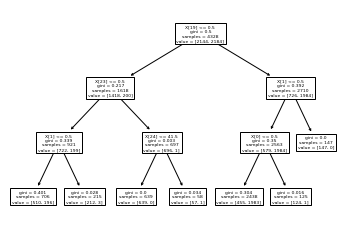

In [ ]:
tree.plot_tree(tree_model)

## MODELING SONOMA CAT

In [ ]:
#creating final cat dataset
#encode categorical variables
X_categ = sonoma_cat[['sex', 'size', 'intake_type', 'outcome_condition']]
X_categ = encoder(X_categ)

print(X_categ)

#reform dataset
X_num = sonoma_cat[['days_in_shelter']]
X_categ['days_in_shelter'] = X_num
X_sonoma_cat = X_categ

print(X_sonoma_cat)

y_sonoma_cat = sonoma_cat['outcome_type']

       0    1    2    3    4    5    6   ...   17   18   19   20   21   22   23
0     0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1     0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
6222  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
6223  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
6224  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0
6225  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
6226  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[6227 rows x 24 columns]
        0    1

depth =  1
training accuracy score:  0.8430406852248394
testing accuracy score:  0.8522800256904303


depth =  2
training accuracy score:  0.8955032119914347
testing accuracy score:  0.8998073217726397


depth =  3
training accuracy score:  0.9188436830835118
testing accuracy score:  0.9197174052665382


depth =  4
training accuracy score:  0.9338329764453961
testing accuracy score:  0.9299935773924213


depth =  5
training accuracy score:  0.9366167023554604
testing accuracy score:  0.9312780989081567


depth =  6
training accuracy score:  0.9385438972162741
testing accuracy score:  0.9299935773924213


depth =  7
training accuracy score:  0.9430406852248394
testing accuracy score:  0.9370584457289659


depth =  8
training accuracy score:  0.9464668094218416
testing accuracy score:  0.9396274887604368


depth =  9
training accuracy score:  0.9488222698072805
testing accuracy score:  0.9351316634553629


depth =  10
training accuracy score:  0.9507494646680942
testing accuracy score:  

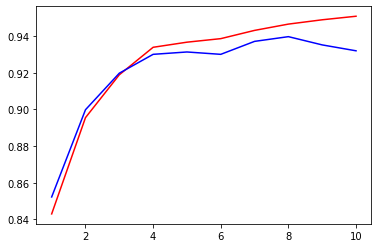

In [ ]:
#finding best depth level for cat
depth_1_to_10(X_sonoma_cat, y_sonoma_cat)

In [ ]:
#sonoma cat model with depth 3

Xtrain, Xtest, ytrain, ytest = train_test_split(X_sonoma_cat, y_sonoma_cat, random_state=12)

tree_model = tree.DecisionTreeClassifier(max_depth = 3)

tree_model = tree_model.fit(Xtrain, ytrain)

In [ ]:
#assessing sonoma cat model with depth 3
y_predict = tree_model.predict(Xtest)
confusion_matrix = metrics.confusion_matrix(ytest, tree_model.predict(Xtest))
tn, fl, fn, tp = metrics.confusion_matrix(ytest, tree_model.predict(Xtest)).ravel()

print('Confusion Matrix: ', '\n', metrics.confusion_matrix(ytest, y_predict))
print('\n')
print('True Negative: ', tn)
print('False Negative: ', fn)
print('True Positive: ', tp)
print('False Positive: ', fl)
print('\n')
print('Training Accuracy Score: ', tree_model.score(Xtrain, ytrain))
print('Testing Accuracy Score: ', tree_model.score(Xtest, ytest)) 
print('\n')
print('Sensitivity Score:', tp/(tp+fl))
print('Specificity Score:', tn/(tn+fn))

Confusion Matrix:  
 [[644 104]
 [ 21 788]]


True Negative:  644
False Negative:  21
True Positive:  788
False Positive:  104


Training Accuracy Score:  0.9188436830835118
Testing Accuracy Score:  0.9197174052665382


Sensitivity Score: 0.8834080717488789
Specificity Score: 0.968421052631579


[Text(193.15384615384616, 190.26, 'X[19] <= 0.5\ngini = 0.5\nsamples = 4670\nvalue = [2278, 2392]'),
 Text(103.01538461538462, 135.9, 'X[24] <= 25.5\ngini = 0.166\nsamples = 1889\nvalue = [1717, 172]'),
 Text(51.50769230769231, 81.53999999999999, 'X[20] <= 0.5\ngini = 0.087\nsamples = 1717\nvalue = [1639, 78]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.046\nsamples = 1563\nvalue = [1526, 37]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.391\nsamples = 154\nvalue = [113, 41]'),
 Text(154.52307692307693, 81.53999999999999, 'X[23] <= 0.5\ngini = 0.496\nsamples = 172\nvalue = [78, 94]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.45\nsamples = 143\nvalue = [49, 94]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(283.2923076923077, 135.9, 'X[4] <= 0.5\ngini = 0.322\nsamples = 2781\nvalue = [561, 2220]'),
 Text(257.53846153846155, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.226\nsamples = 2552\nvalue =

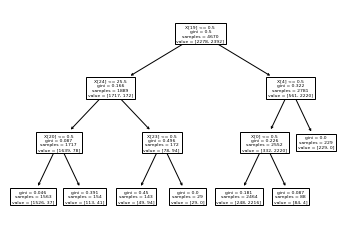

In [ ]:
tree.plot_tree(tree_model)

# Ethics and Privacy

The data we are using for our project is public data, we found our data through public datasets offered for the city of Austin and the county of Sonoma. Due to the datasets being public information, we do not need to ask for any specific permission to use data. We would like to credit the City of Austin and Sonoma County for their datasets.
There is no bias in our project as we split the datasets for both cities and a dataset for dogs and a dataset for cats. Overall, we don’t believe there are any issues that invade data privacy nor ignore ethical laws. 

Given the results of our analysis and models, we do have concerns with any possible implementation of the models created in this research. While these models perform significantly better than mere random chance (50%). We don't find that the accuracy scores are high enough to ensure that such models ought to be used as definitive and sole predictors in assessing the adoptability of an animal for actual shelter management. There are enough false predictions in each model to create possible moral concern. Just as model accuracy for medical use have high thresholds for use, we believe that these models don't meet the required thresholds to be the sole determinants for assessing animal adoptability. Any implementation of these models ought to be used in conjunction with other considerations.


#Conclusion and Discussion

The decision tree classifiers did a fairly good job of prediciting adoption across the four datasets. Here I will individually discuss the models and then after discuss the models with respect to their geographic counterpart. The scores we used for assessment are accuracy, sensitivity, and specificity. We chose to include all three scores because the models varied with regard to positives more than negatives.

##Austin Dog##
The Austin Dog classifier looked only at the dogs that came from the Austin Shelter dataset. In this classifier, our model had an accuracy score of around 78%, sensitivity score of around 76%, and specificity score of 90%. We can see that specificity (predictions on negatives) seemed to perform the best and this will be characteristic of our future models as well. 

##Austin Cat##
The Austin Cat classifier looked only at the cats that came from the Austin Shelter dataset. In this classifier, our model had an accuracy score of around 83%, sensitivity score of around 75%, and specificity score of 93%. 

##Sonoma Dog##
The Sonoma Dog classifier looked only at the dogs that came from the Sonoma Shelter dataset. In this classifier, our model had an accuracy score of around 85%, sensitivity score of around 80%, and specificity score of 90%. 

##Sonoma Cat##
The Sonoma Cat classifier looked only at the cats that came from the Sonoma Shelter dataset. In this classifier, our model had an accuracy score of around 92%, sensitivity score of around 88%, and specificity score of 96%. We can see that specificity (predictions on negatives) seemed to perform the best and this will be characteristic of our future models as well. 

##General Discussion##
A large emphasis we wanted to have on the analysis was comparing predictive models across the Sonoma and Austin datasets. Would there be differences given the vast cultural, geographic, legal, and many other differences between the City of Austin and County of Sonoma? Our models seem to indicate there are differences in our ability to predict adoption, but the differneces can be statistical (as opposed to real differences). 

First when we make the geographic comparisons between the Austin and Sonoma models, we see that there tends to be higher accuracy scores, for both dog and cat, of Sonoma models than Austin models. Sonoma Dog model has better accuracy score by 7% while Sonoma Cat model has better accuracy score by 9%. These differences are significant and largely can be explained by their differenes in sensitivity scores, which consider the predictions of positives. Sonoma Dog had sensitivity score difference of 4% while Sonoma Cat had sensitivity score difference of 13%. These indicate to us that comparatively, the Austin models were uniquely worse at classifying positive values than Sonoma. All models had quite high specificity scores indicating that none of the models had issues classifying negative predictions. 

Some possible explanations for the Austin models poorer sensitivity scores could be attributable to the lack of euthanizations by the Austin Shelter. The Austin Shelter does not euthanize their animals as the Sonoma County does. There is a good chance that when euthanization is an option, shelters would consider enuthanization as the default alternative to adoption. In our data cleaning, we transformed all outcome types to either 1 (adoption) or 0 (not adopted). By not having euthanizations, this may change the risk assessment, internally, of the Austin Shelter.

Given the many aforementioned differences between the two shelters, it is surprising how similarly well the models performed. We are largely satisfied with the strength of these models as they do a strong job adequately predicting adoptions. 

We conclude that our research was successful in creating strong classification models for predicting adoption. On top of that, we note that differences in the Austin and Sonoma datasets seem to stem from a difference in classification of positive predictions as seen in the differences in specificity scores. While these differences are notable, they can possibly be due to shelter policy differences but we can't explore this possibility any further with the publically available datasets used. We have good reason to affirm our hypthosesis on the efficacy of our model and tentatively affirm our hypothesis on the lack of difference between Sonoma and Austin shelter adoptions. 




# Team Contributions

**Brendon Hahm:** Cleaned data for Sonoma County, created functions for modelling and assessment, created models for Sonoma County, worked on Ethics and Privacy, worked on Conclusion and Discussion. 

**Shendo Yafuso:** Markups of the code, revisions on data cleaning and data analysis, visualizations for the EDA.

**Justin Cun:** Cleaned up data for city of Austin, ran predictive modeling for Austin dataframes, cleaned up code throughout project, wrote hypothesis

**Daren Nguyen:** Worked on the Ethics and Privacy section, wrote up the Background and Prior Work, recorded the video, and did slight markups on the code